# **Setup, install dependencies**

In [ ]:
# Clone repo and install requirements

!git clone https://github.com/suragnair/alpha-zero-general.git

Cloning into 'alpha-zero-general'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1045 (delta 0), reused 3 (delta 0), pack-reused 1041
Receiving objects: 100% (1045/1045), 423.63 MiB | 19.50 MiB/s, done.
Resolving deltas: 100% (574/574), done.
Checking out files: 100% (109/109), done.


In [ ]:
%cd '/content/alpha-zero-general'

/content/alpha-zero-general


In [ ]:
!git checkout -t origin/master

Branch 'dotsandboxes' set up to track remote branch 'dotsandboxes' from 'origin'.
Switched to a new branch 'dotsandboxes'


In [ ]:
!pip install -r docker/requirements.txt

     |████████████████████████████████| 430kB 2.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 3.4MB 12.0MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 450kB 37.0MB/s 
     |████████████████████████████████| 15.0MB 113kB/s 
     |████████████████████████████████| 12.2MB 52.8MB/s 
     |████████████████████████████████| 11.8MB 65.0MB/s 
     |████████████████████████████████| 31.2MB 81kB/s 
     |████████████████████████████████| 12.4MB 266kB/s 
     |████████████████████████████████| 25.3MB 107kB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=5f0db9c55a17c89973d8bc7

# **Instantiate players**

In [ ]:
import os
import numpy as np

import Arena
from MCTS import MCTS
from dotsandboxes.DotsAndBoxesGame import DotsAndBoxesGame
from dotsandboxes.DotsAndBoxesPlayers import HumanDotsAndBoxesPlayer, RandomPlayer, GreedyRandomPlayer
from dotsandboxes.keras.NNet import NNetWrapper

from utils import dotdict

In [ ]:
game = DotsAndBoxesGame(n=3)

In [ ]:
hp1 = HumanDotsAndBoxesPlayer(game).play
hp2 = HumanDotsAndBoxesPlayer(game).play

In [ ]:
rp1 = RandomPlayer(game).play
rp2 = RandomPlayer(game).play

In [ ]:
grp1 = GreedyRandomPlayer(game).play
grp2 = GreedyRandomPlayer(game).play

In [ ]:
numMCTSSims = 50

In [ ]:
nnet1 = NNetWrapper(game)
nnet1.load_checkpoint(os.path.join('pretrained_models', 'dotsandboxes', 'keras', '3x3'), 'best.pth.tar')
args1 = dotdict({'numMCTSSims': numMCTSSims, 'cpuct': 1.0})
mcts1 = MCTS(game, nnet1, args1)
alphazero1 = lambda x: np.argmax(mcts1.getActionProb(x, temp=0))

In [ ]:
nnet2 = NNetWrapper(game)
nnet2.load_checkpoint(os.path.join('pretrained_models', 'dotsandboxes', 'keras', '3x3'), 'best.pth.tar')
args2 = dotdict({'numMCTSSims': numMCTSSims, 'cpuct': 1.0})
mcts2 = MCTS(game, nnet2, args2)
alphazero2 = lambda x: np.argmax(mcts2.getActionProb(x, temp=0))

# **Play *Random* vs *Greedy Random***

*Random* will, as it name says, play all its moves randomly.

*Greedy Random* will also play randomly, with the exception that whenever it has the chance to score, it will do that.

Let's play 100 games. We expect Greedy Random to win most of the games.

In [ ]:
# Play Random vs Greedy Random
player1 = rp1
player2 = grp2
arena = Arena.Arena(player1, player2, game, display=DotsAndBoxesGame.display)
%time oneWon, twoWon, draws = arena.playGames(100, verbose=False)
print("\nRandom won {} games, Greedy Random won {} games".format(oneWon, twoWon))

Arena.playGames (2): 100%|██████████| 50/50 [00:00<00:00, 172.99it/s]

CPU times: user 571 ms, sys: 15.4 ms, total: 587 ms
Wall time: 573 ms

Random won 2 games, Greedy Random won 98 games


# **Play *Greedy Random* vs *Greedy Random***

When both players are Greedy Random, we expect that each wins roughly 50% of the games.

Let's play 100 games again.

In [ ]:
# Play Greedy Random vs Greedy Random
player1 = grp1
player2 = grp2
arena = Arena.Arena(player1, player2, game, display=DotsAndBoxesGame.display)
%time oneWon, twoWon, draws = arena.playGames(100, verbose=False)
print("\nGreedy Random #1 won {} games, Greedy Random #2 won {} games".format(oneWon, twoWon))

Arena.playGames (2): 100%|██████████| 50/50 [00:00<00:00, 136.39it/s]

CPU times: user 753 ms, sys: 12.6 ms, total: 765 ms
Wall time: 750 ms

Greedy Random #1 won 47 games, Greedy Random #2 won 53 games


# **Play *Greedy Random* vs *AlphaZero***

When both players are Greedy Random, we expect AlphaZero to win most of the games.

Let's play 10 games. AlphaZero is considerably slower than GreedyRandom. 10 games will take roughly 2.5 minutes.

In [ ]:
# Play Greedy Random vs AlphaZero
player1 = grp1
player2 = alphazero1
arena = Arena.Arena(player1, player2, game, display=DotsAndBoxesGame.display)
%time oneWon, twoWon, draws = arena.playGames(10, verbose=False)
print("\nGreedy Random won {} games, Alpha Zero won {} games".format(oneWon, twoWon))

Arena.playGames (2): 100%|██████████| 5/5 [01:11<00:00, 14.23s/it]

CPU times: user 2min 14s, sys: 8.07 s, total: 2min 22s
Wall time: 2min 18s

Greedy Random won 1 games, Alpha Zero won 9 games


# **Play against vs *AlphaZero***

Now you can try playing against AlphaZero, you can use the following number guide.
You will play one game as the second player and one as the first player.

You can also play it directly in this WebApp:

https://carlos-aguayo.github.io/alphazero/


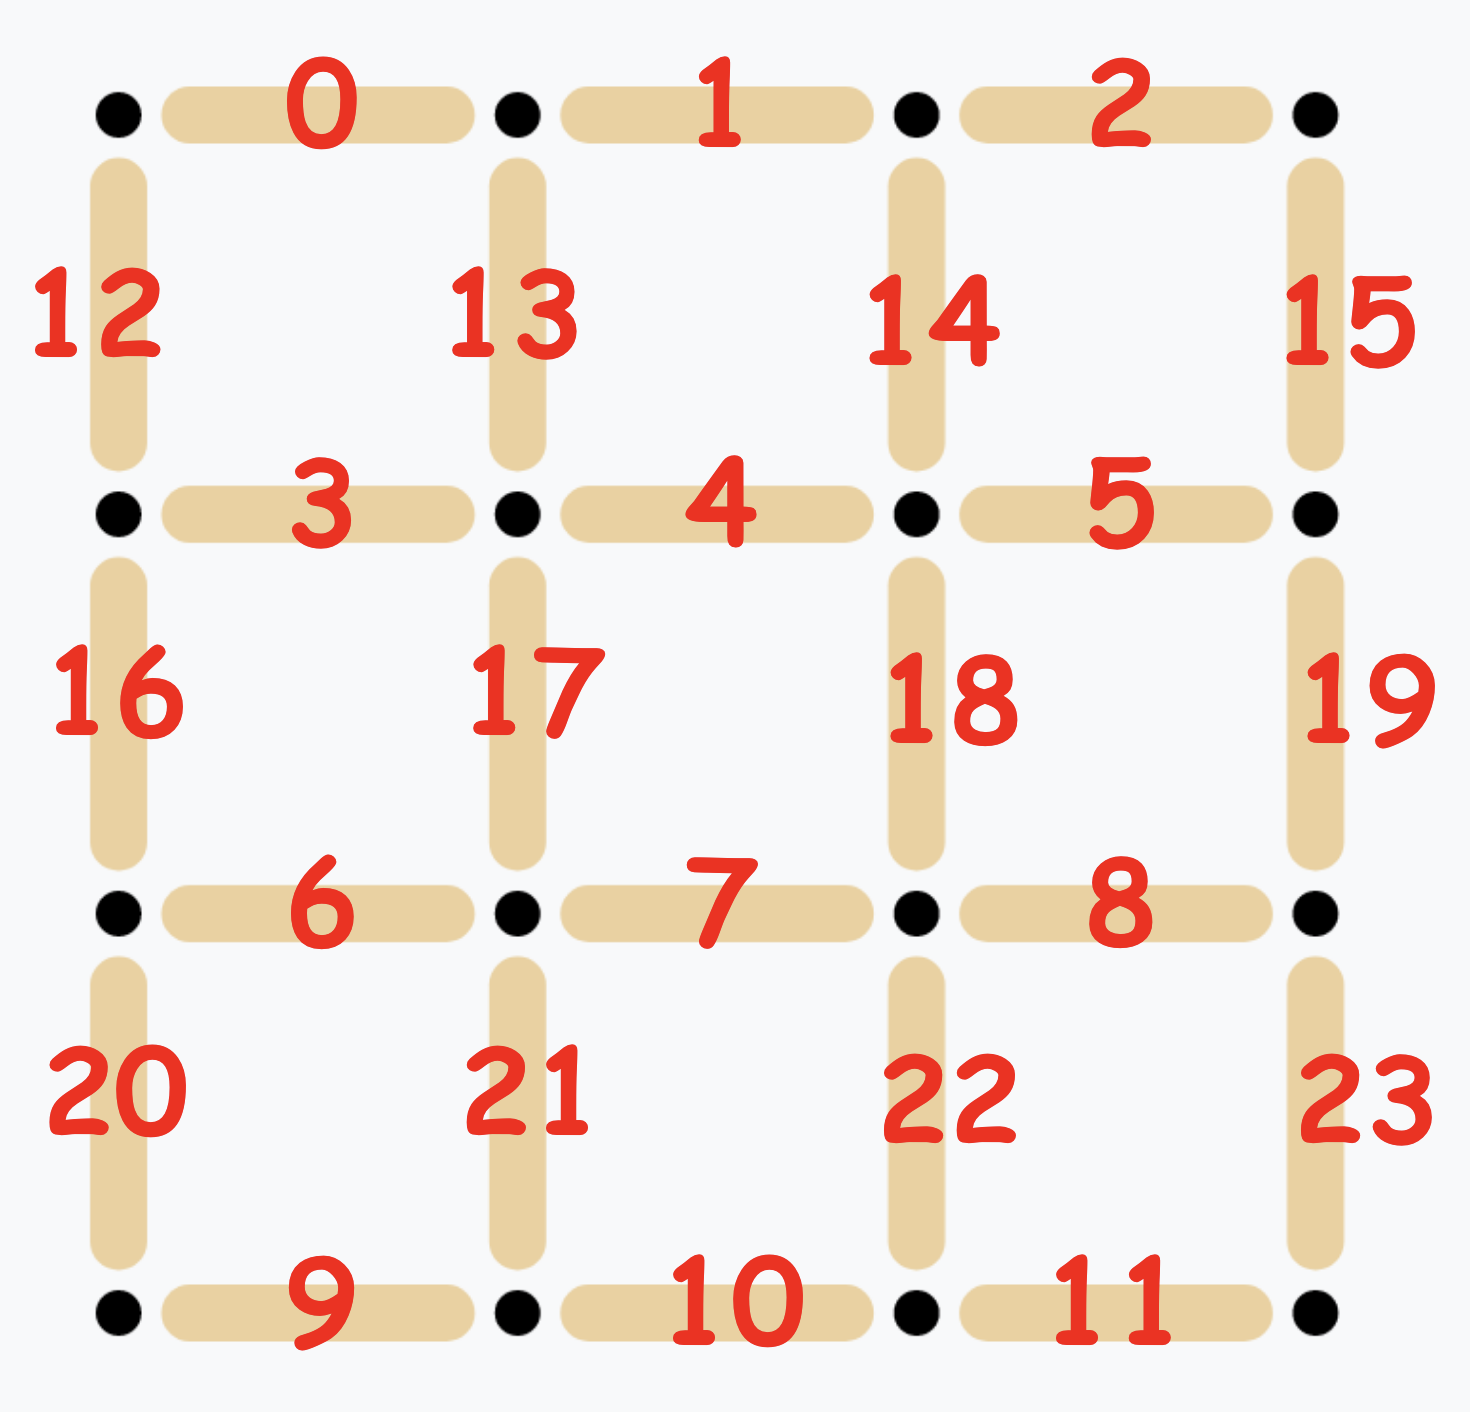

In [ ]:
from IPython.display import Image
Image('https://i.imgur.com/qcui7ba.png', width=400)

In [ ]:
# Play Greedy Random vs AlphaZero
player1 = hp1
player2 = alphazero1
arena = Arena.Arena(player1, player2, game, display=DotsAndBoxesGame.display)
oneWon, twoWon, draws = arena.playGames(2, verbose=True)
print("You won {} games, Alpha Zero won {} games".format(oneWon, twoWon))

Arena.playGames (1):   0%|          | 0/1 [00:00<?, ?it/s]

Turn  1 Player  1
*---*---*---*
|   |   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*

Pass: 0.0
Score 0.0 x 0.0
Valid moves: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
0
Turn  2 Player  -1
*-x-*---*---*
|   |   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*

Pass: 0.0
Score 0.0 x 0.0
Turn  3 Player  1
*-x-*---*---*
|   x   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*

Pass: 0.0
Score 0.0 x 0.0
Valid moves: [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23]
1
Turn  4 Player  -1
*-x-*-x-*---*
|   x   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*

Pass: 0.0
Score 0.0 x 0.0
Turn  5 Player  1
*-x-*-x-*---*
|   x   |   |   
*---*---*---*
|   |   |   |   
*---*---*---*
|   x   |   |   
*---*---*---*

Pass: 0.0
Score 0.0 x 0.0
Valid moves: [ 2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 2

Arena.playGames (2):   0%|          | 0/1 [00:00<?, ?it/s]

Turn  28 Player  -1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   |   |   |   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 0.0
Score 3.0 x 3.0
Turn  29 Player  1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   |   |   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 1.0
Score 3.0 x 4.0
Turn  30 Player  -1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   |   |   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 0.0
Score 3.0 x 4.0
Turn  31 Player  1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   x   |   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 1.0
Score 3.0 x 5.0
Turn  32 Player  -1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   x   |   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 0.0
Score 3.0 x 5.0
Game over: Turn  32 Result  -1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 1.0
Score 3.0 x 6.0
Turn  1 Player  1
*---*---*---*
|   |   |   |   
*---*---*---*
|   

Arena.playGames (2): 100%|██████████| 1/1 [00:46<00:00, 46.46s/it]

Game over: Turn  32 Result  1
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*
x   x   x   x   
*-x-*-x-*-x-*

Pass: 1.0
Score 8.0 x 1.0
\You won 0 games, Alpha Zero won 2 games
